In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium
from sqlalchemy import create_engine
from shapely.geometry import shape
from io import BytesIO
import base64

from dotenv import load_dotenv
import os
import json

# .env 파일을 찾아 환경 변수로 로드
load_dotenv()

# 환경 변수 가져오기
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ▶️ MySQL 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


In [18]:
query1 = """
DESCRIBE animal_pharmacy_registry
"""
query2 = """
SHOW tables
"""
pd.read_sql(query1, engine)

,Field,Type,Null,Key,Default,Extra
0,id,int,NO,PRI,None,auto_increment
1,service_name_open,varchar(100),YES,,None,
2,service_id_open,varchar(100),YES,,None,
3,open_gov_code,varchar(10),YES,,None,
4,mgmt_num,varchar(50),YES,,None,
5,licensg_de,date,YES,,None,
6,licensg_cncl_de,date,YES,,None,
7,status_code,varchar(10),YES,,None,
8,status_name,varchar(50),YES,,None,
9,detail_status_code,varchar(10),YES,,None,


In [19]:
# ▶️ animal_pharmacy_registry 등록 데이터 가져오기
query = """
SELECT *
FROM animal_pharmacy_registry
"""
df = pd.read_sql(query, engine)
df

,id,service_name_open,service_id_open,open_gov_code,mgmt_num,licensg_de,licensg_cncl_de,status_code,status_name,detail_status_code,...,data_update_type,data_update_de,category_name,x,y,business_type_name,business_type_detail,right_holder_serial,total_personnel,created_at
0,1,동물약국,02_03_02_P,3620000,362000001120040001,2004-03-30,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,190911.687703,187580.179883,동물약국,None,000,NaN,2025-07-03 11:08:02
1,2,동물약국,02_03_02_P,3620000,362000001120130005,2013-06-17,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,192260.597948,186694.581034,동물약국,None,000,NaN,2025-07-03 11:08:02
2,3,동물약국,02_03_02_P,3620000,362000001120120001,2012-07-03,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,187543.487759,189718.506722,동물약국,None,000,NaN,2025-07-03 11:08:02
3,4,동물약국,02_03_02_P,3620000,362000001120130001,2013-04-12,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,188363.432263,188765.633977,동물약국,None,000,NaN,2025-07-03 11:08:03
4,5,동물약국,02_03_02_P,3620000,362000001120130002,2013-05-23,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,190942.240263,186908.545005,동물약국,None,000,NaN,2025-07-03 11:08:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18761,18762,동물약국,02_03_02_P,4160000,416000001120120001,2012-02-29,None,4,취소/말소/만료/정지/중지,0004,...,I,2018-08-31 23:59:59,None,245272.399228,480386.602338,동물약국,None,000,NaN,2025-07-03 11:16:40
18762,18763,동물약국,02_03_02_P,4160000,416000001120180002,2018-04-19,None,4,취소/말소/만료/정지/중지,0004,...,U,2022-09-04 02:40:00,None,244879.168855,481274.867898,동물약국,None,000,0.0,2025-07-03 11:16:40
18763,18764,동물약국,02_03_02_P,4450000,445000001120250001,2025-01-31,None,4,취소/말소/만료/정지/중지,0004,...,U,2025-05-01 02:40:00,None,247467.823537,377985.678538,동물약국,None,000,0.0,2025-07-03 11:16:40
18764,18765,동물약국,02_03_02_P,5710000,571000001120230008,2023-04-04,None,1,영업/정상,BBBB,...,U,2024-08-22 02:40:00,None,241449.090046,347197.268767,동물약국,None,000,0.0,2025-07-03 11:16:40


In [23]:

# ▶️ 서울 동물약국 수 정보 가져오기
  # 영업/정상 : 필터링
  # 서울특별시 : 지역으로 필터링
  
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE '영업/정상') AND (jibun_address LIKE '서울특별시%%')
"""
df = pd.read_sql(query, engine)
df

,id,service_name_open,service_id_open,open_gov_code,mgmt_num,licensg_de,licensg_cncl_de,status_code,status_name,detail_status_code,...,data_update_type,data_update_de,category_name,x,y,business_type_name,business_type_detail,right_holder_serial,total_personnel,created_at
0,83,동물약국,02_03_02_P,3140000,314000001120150005,2015-07-07,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,185494.645272,447737.318006,동물약국,None,000,NaN,2025-07-03 11:08:05
1,84,동물약국,02_03_02_P,3030000,303000001120140003,2014-11-17,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,202527.370519,450941.849941,동물약국,None,000,NaN,2025-07-03 11:08:05
2,85,동물약국,02_03_02_P,3030000,303000001120150001,2015-01-09,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,204712.095250,448359.934294,동물약국,None,000,NaN,2025-07-03 11:08:05
3,86,동물약국,02_03_02_P,3030000,303000001120150004,2015-08-12,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,204788.453049,448470.237859,동물약국,None,000,NaN,2025-07-03 11:08:05
4,87,동물약국,02_03_02_P,3030000,303000001120150005,2015-08-21,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,202401.066045,451809.190992,동물약국,None,000,NaN,2025-07-03 11:08:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,12717,동물약국,02_03_02_P,3150000,315000001120240025,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,186386.587594,447781.141806,동물약국,None,000,0.0,2025-07-03 11:13:58
2630,12720,동물약국,02_03_02_P,3150000,315000001120240026,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,188612.842595,449897.366377,동물약국,None,000,0.0,2025-07-03 11:13:58
2631,12721,동물약국,02_03_02_P,3220000,322000001120240058,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,201543.962547,446856.814680,동물약국,None,000,0.0,2025-07-03 11:13:58
2632,12722,동물약국,02_03_02_P,3220000,322000001120240059,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,203092.721986,442550.634568,동물약국,None,000,0.0,2025-07-03 11:13:58


In [24]:
# 구 이름 추출 방법 1: 문자열 분할
df['district'] = df['jibun_address'].str.split(' ').str[2]

# 구 이름 추출 방법 2: 정규표현식 사용
import re
df['district'] = df['jibun_address'].str.extract(r'서울특별시 ([가-힣]+구)')

# 구별 개수 집계
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'hospital_count']
district_counts = district_counts.sort_values('hospital_count', ascending=False)

print(district_counts)

   district  hospital_count
0       강남구             287
1       송파구             180
2       서초구             158
3       강동구             156
4       강서구             146
5       은평구             125
6       관악구             118
7       노원구             117
8      영등포구             116
9       마포구             115
10      구로구              92
11     동대문구              92
12      광진구              89
13      중랑구              88
14      성북구              87
15      양천구              83
16      종로구              81
17     서대문구              78
18      도봉구              73
19      강북구              69
20      동작구              67
21      성동구              66
22      금천구              62
23       중구              57
24      용산구              32


/home/park/eda-repo-3/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


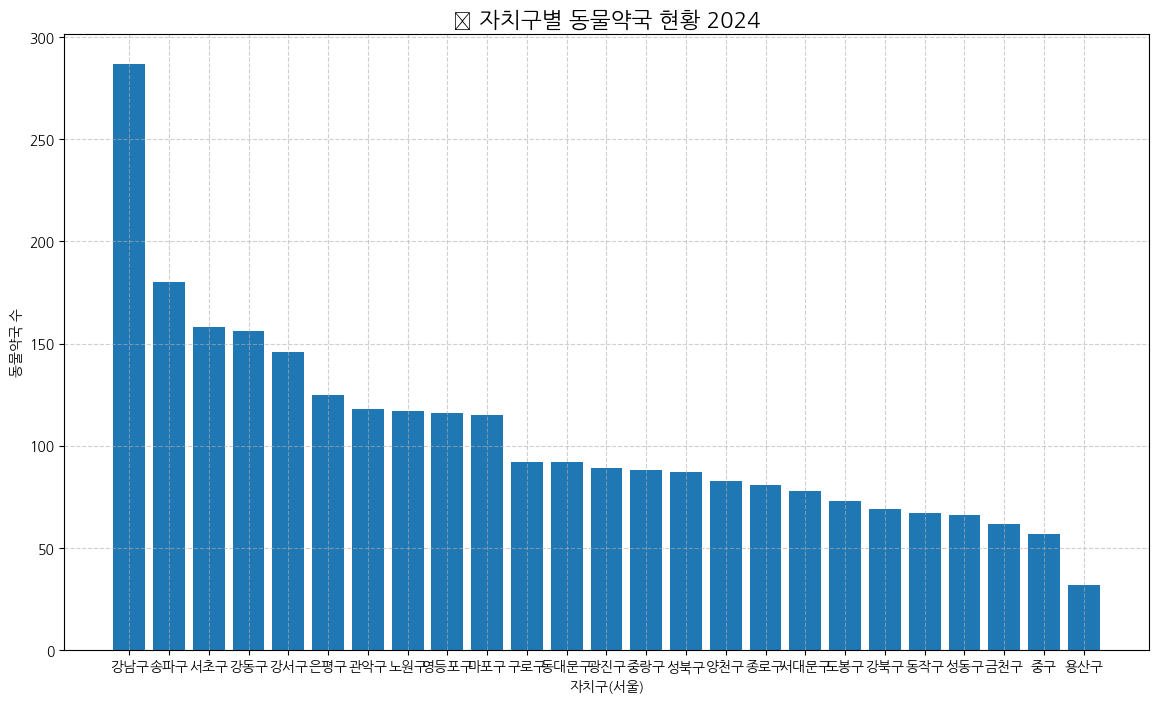

In [25]:
# ▶️ 시각화 (자치구별 연도별 유기견 발생 추이)
plt.figure(figsize=(14, 8))
plt.bar(district_counts['district'], district_counts['hospital_count'])
plt.title("✅ 자치구별 동물약국 현황 2024", fontsize=16)
plt.xlabel("자치구(서울)")
plt.ylabel("동물약국 수")
plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
plt.show()